In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# Load the datasets
# The births dataset contains information on births in the US from 2016 to 2021
births_df = pd.read_csv('../Data/us_births_2016_2021.csv')
# The regions dataset contains information on US state divisions and regions
regions_df = pd.read_csv('../Data/US State Divison Regions.csv')

In [4]:
# Merge datasets
# This step combines the birth data with regional information based on state abbreviations
merged_df = pd.merge(births_df, regions_df, left_on='State Abbreviation', right_on='State Code')

In [6]:
# Show the merged dataframe
merged_df.head()

,State_x,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Index,State_y,State Code,Division,Region
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9,2,Alabama,AL,South,East South Central
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0,2,Alabama,AL,South,East South Central
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0,2,Alabama,AL,South,East South Central
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9,2,Alabama,AL,South,East South Central
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3,2,Alabama,AL,South,East South Central


In [7]:
# Rename the 'State_x' column to 'State Name'
merged_df.rename(columns={'State_x': 'State'}, inplace=True)

# Show the merged dataframe
merged_df.head()


,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Index,State_y,State Code,Division,Region
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9,2,Alabama,AL,South,East South Central
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0,2,Alabama,AL,South,East South Central
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0,2,Alabama,AL,South,East South Central
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9,2,Alabama,AL,South,East South Central
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3,2,Alabama,AL,South,East South Central


In [8]:
# Aggregate births by state, year, and region
# This step sums up the number of births for each state, year, and region combination
agg_df = merged_df.groupby(['State', 'Year', 'Region'])['Number of Births'].sum().reset_index()

In [9]:
# Show the aggregated dataframe
agg_df.head()

,State,Year,Region,Number of Births
0,Alabama,2016,East South Central,59151
1,Alabama,2017,East South Central,58941
2,Alabama,2018,East South Central,57761
3,Alabama,2019,East South Central,58615
4,Alabama,2020,East South Central,57647


In [10]:
# Calculate total births by region and year
# This provides an overview of birth trends for each region over time
region_year_births = agg_df.groupby(['Region', 'Year'])['Number of Births'].sum().reset_index()

# Show the region-year-births dataframe
region_year_births.head()

,Region,Year,Number of Births
0,East North Central,2016,555551
1,East North Central,2017,544793
2,East North Central,2018,535725
3,East North Central,2019,526604
4,East North Central,2020,505773


In [11]:
# Pivot the data for easier plotting
# This reshapes the data so that each region becomes a column, making it easier to create charts
pivot_df = region_year_births.pivot(index='Year', columns='Region', values='Number of Births')

# Show the pivoted dataframe
pivot_df.head()

Region,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
Year,,,,,,,,,
2016,555551,233335,476339,304699,148851,654135,748710,272142,552091
2017,544793,232066,468732,295245,146621,630813,741149,265258,530802
2018,535725,229434,463134,289016,144073,610251,732341,262676,525057
2019,526604,228770,455354,286800,142529,599851,727520,257856,522247
2020,505773,223477,437985,278137,138452,568419,704470,248528,508392


<Figure size 1800x800 with 0 Axes>

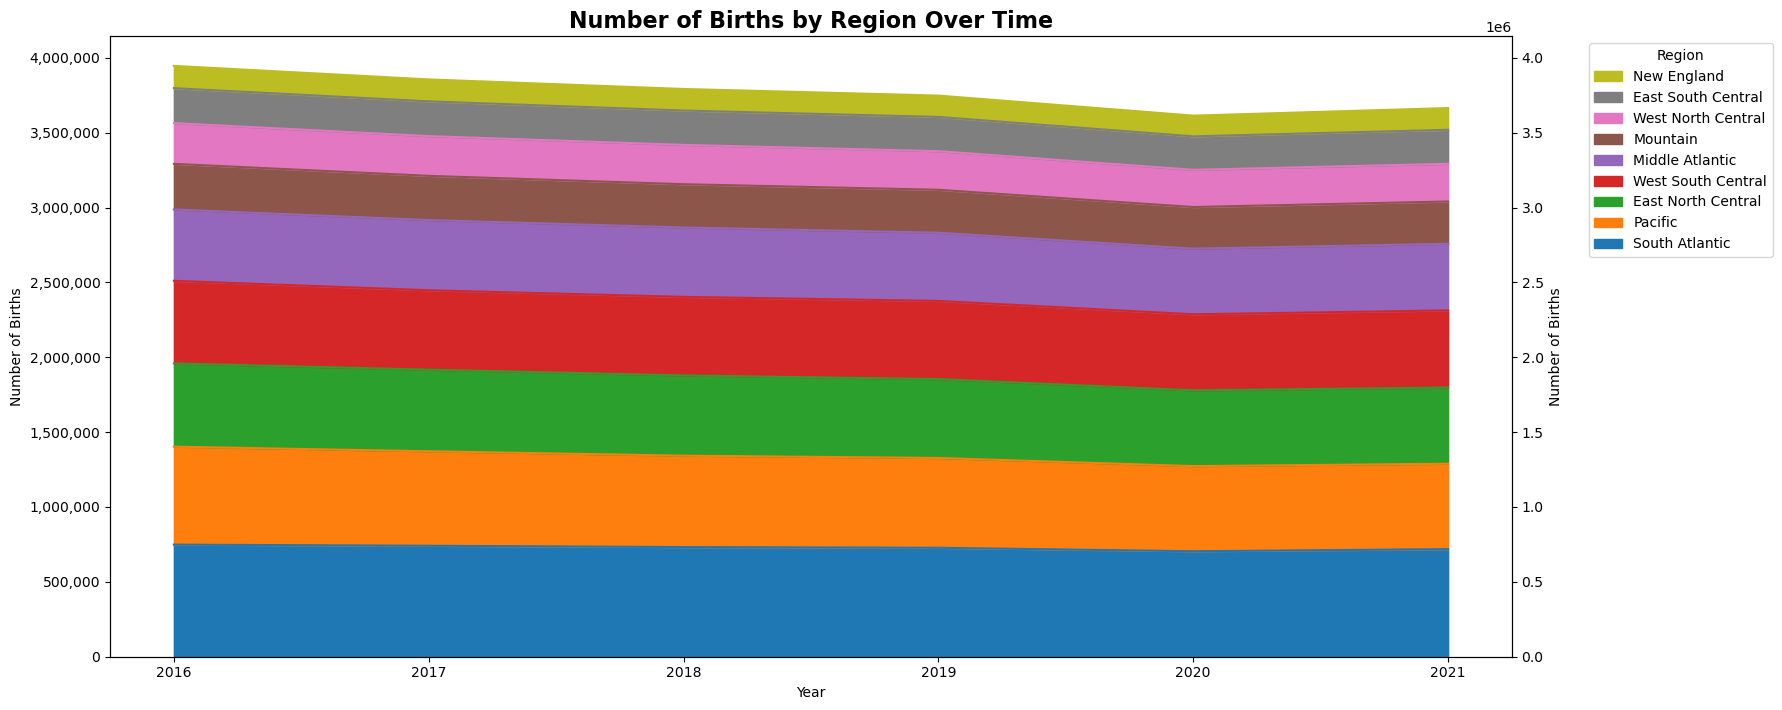

In [23]:
# Sort regions from highest births to lowest
sorted_regions = pivot_df.sum().sort_values(ascending=False).index

# Create a stacked area chart
plt.figure(figsize=(18, 8))  # Control the width to 18 for a wider x-axis
fig, ax1 = plt.subplots(figsize=(20, 8))
pivot_df[sorted_regions].plot(kind='area', stacked=True, ax=ax1)
ax1.set_title('Number of Births by Region Over Time', fontweight='bold', fontsize=16)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Births')

# Create legend with sorted regions
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a twin Axes sharing the x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Births')
ax2.set_ylim(ax1.get_ylim())  # Set the same y-axis limits as the left axis

# Add y-axis labels
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout to prevent cutting off y-axis labels
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

# plt.savefig('stacked_area_chart.png')  # Commented out the option to save the figure
plt.show()  # Display the plot
plt.close()

In [40]:
# Create a choropleth map
# Create a dataframe of unique states from the 'State' column in the aggregated dataframe and keep the column name 'State'
unique_states = agg_df['State'].unique()

# Give the dataframe a name 'State'
unique_states = pd.DataFrame(unique_states, columns=['State'])

# Show unique_states dataframe
print(unique_states.head())


        State
0     Alabama
1      Alaska
2     Arizona
3    Arkansas
4  California


In [44]:
# Show agg_df dataframe
print(agg_df.head())

     State  Year              Region  Number of Births
0  Alabama  2016  East South Central             59151
1  Alabama  2017  East South Central             58941
2  Alabama  2018  East South Central             57761
3  Alabama  2019  East South Central             58615
4  Alabama  2020  East South Central             57647


In [45]:
# Show regions_df dataframe
print(regions_df.head())


   Index       State State Code Division              Region
0      1      Alaska         AK     West             Pacific
1      2     Alabama         AL    South  East South Central
2      3    Arkansas         AR    South  West South Central
3      4     Arizona         AZ     West            Mountain
4      5  California         CA     West             Pacific


In [46]:
# Calculate average births per year for each state
state_births = agg_df.groupby('State')['Number of Births'].mean().reset_index()
state_births = pd.merge(state_births, regions_df[['State', 'State Code']], on='State')

# Show state_births dataframe
print(state_births.head())


        State  Number of Births State Code
0     Alabama      58361.500000         AL
1      Alaska      10066.333333         AK
2     Arizona      80225.500000         AZ
3    Arkansas      36765.333333         AR
4  California     450458.500000         CA


In [50]:
# Create and show the choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=state_births['State Code'],
    z=state_births['Number of Births'].astype(float),
    locationmode='USA-states',
    colorscale='YlOrRd',
    colorbar_title="Average Annual Births"
))

# Update layout
fig.update_layout(
    title_text='Average Annual Births by State (2016-2021)',
    geo_scope='usa',
    geo=dict(
        projection=dict(
            type='albers usa',
            scale=1.1  # Increase the scale to make states bigger
        ),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'
    )
)

# Show the map
fig.show()


             State  Number of Births State Code
4       California     450458.500000         CA
43           Texas     379684.000000         TX
32        New York     221979.500000         NY
9          Florida     219354.500000         FL
13        Illinois     142377.500000         IL
38    Pennsylvania     135062.000000         PA
35            Ohio     133915.666667         OH
10         Georgia     126395.666667         GA
33  North Carolina     119296.500000         NC
22        Michigan     108618.833333         MI


Text(0, 0.5, 'Average Annual Births')

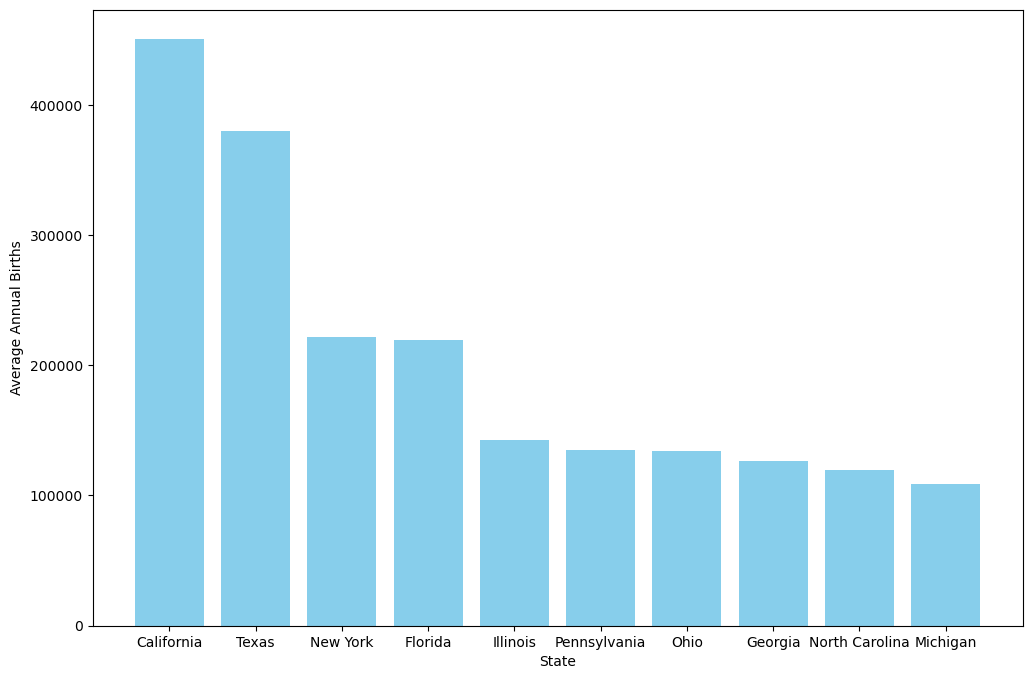

In [52]:
# Show the top 10 states with the highest average births and their average births and ranking
top_states = state_births.sort_values(by='Number of Births', ascending=False).head(10)
print(top_states)

# Create a bar chart of the top 10 states with the highest average births
plt.figure(figsize=(12, 8))
plt.bar(top_states['State'], top_states['Number of Births'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Annual Births')

